In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import spdiags
from scipy.sparse.linalg import spsolve

%matplotlib inline

# Interpolation
So at this point, we now want to look at the following problem. Suppose I give you some data in the form of a set of points
$$\left\{ x_{j}, f_{j} \right\}^{n}_{j=0}$$
where we think that $f_{j}=f(x_{j})$, which is to say, we think the data comes from a function $f(x)$, but we do not know the function $f(x)$. Note, each point $x_{j}$ is called a *node*.
The question becomes, how might we find an approximation to $f(x)$? As it turns out, there are an infinite number of ways to solve this problem, each with good and bad features. The approach we will study first is _Lagrange Interpolation_.

This method starts by deciding we are going to fit the data with an $n^{th}$ order polynomial, i.e. we choose a polynomial $P_{n}(x)$ of the form
$$P_{n}(x) = p_{0} + p_{1}x + \cdots + p_{n}x^{n},$$
where the coefficients $p_{j}$ are found from the _interpolation formulas_
$$P_{n}(x_{j}) = f_{j}, j = 0, \cdots, n.$$
As you can see, we have $n+1$ unknown coefficients $p_{j}$ and we have $n+1$ equations provided by the interpolation formulas. Thus, we see taht in principle we should be able to determine $P_{n}(x)$. The advantage of having $P_{n}$ is that anything else we want to know about $f(x)$, such as $f^{\prime}(x)$ or $\int f(x) dx$, we can find by using $P_{n}$.

Now, there is another important way to think about $P_{n}$. While it is _completely equivalent_ to what we have described above, it forms a very fundamental way to think about interpolation that comes up again and again in applied mathematics and numerical analysis. In this approach, we write $P_{n}(x)$ as $$P_{n} = \sum_{j=0}^{n} f_{j}L_{j}^{(n)}(x),$$
where the functions $L_{j}^{(n)}(x)$ are themselves $n^{th}$-order polynomials which are defined so that
$$L_{j}^{(n)}(x_{j}) = 1, L_{j}^{(n)}(x_{k}) = 0, k \neq j.$$
We can see this idea illustrated in the figure below. Here, we are interpolation through the data set

<div align = "center">

| $x_{j}$ | $f_{j}$ |
|---------|---------|
| -9      | 5       |
| -1      | -2      |
| 7       | 9       |
| -4      | 2       |

</div>
"Graph"

So, if we think about it, we ultimately see that we can find the $L_{j}^{(n)}(x) via the formula
$$L_{j}^{(n)} = \frac{\prod^{n}_{i \neq j} (x- x_{j})}{\prod^{n}_{i \neq j} (x_{j} - x_{i})}.$$
We can motivate this result by looking at simple cases and working our way up. So, suppose we let $n=1$. In this case, we nned to find two linear functions $L_{0}^{(1)}(x)$ and
$L_{1}^{(1)}(x)$. As we can readily see, in order to satisfy our requirements for these functions, we can jest use
$$L_{0}^{(1)}(x) = \frac{x- x_{1}}{x_{0}-x_{1}}, L_{1}^{(1)}(x_{0}) = \frac{x-x_{0}}{x_{1}-x_{0}}.$$
We clearly see in this case that $$L_{0}^{(1)}(x_{0})=1, L_{0}^{(1)}(x_{1}) = 0, L_{1}^{(1)}(x_{0}) = 0, L_{1}^{(1)}(x_{1})=1.$$

Likewise, if we go to $n=2$, we need three different quadratic functions which, using either the formula or our intuition, we realize are
$$
L_{0}^{(2)}(x) = \frac{(x-x_{1})(x-x_{2})}{(x_{0}-x_{1})}{(x_{0}-x_{2})}, 
L_{1}^{(2)}(x) = \frac{(x-x_{0})(x-x_{2})}{(x_{1}-x_{0})}{(x_{1}-x_{2})},
L_{2}^{(2)}(x) = \frac{(x-x_{0})(x-x_{1})}{(x_{2}-x_{0})}{(x_{2}-x_{1})}.$$
So as we see, we can build $P_{n}(x)$ from the weighted $L_{j}^{(n)}$ functions, which act as a _basis_ for our interpolating polynomial. The question then is, how can we numerically determine the functions $L_{j}^{(n)}(x)$. This is done in the code below.

In [2]:
def lfun(xvals, jj, x):
    lval = np.ones(x.size)
    xjj = xvals[jj]
    xrem = xvals[:jj]
    xrem = np.append(xrem, xvals[jj+1:])
    denom = np.prod(xjj - xrem)
    for val in xrem:
        lval *= (x-val)
    return lval/denom

In [3]:
def lagran_interp(xvals, fvals, x):
    n = fvals.size
    ipoly = np.zeros(x.size)
    for jj in range(n):
        ipoly += fvals[jj]*lfun(xvals, jj, x)
    return ipoly

If we try to recreate the example seen in the figure above, we use

Text(0, 0.5, '$P_{3}(x)$')

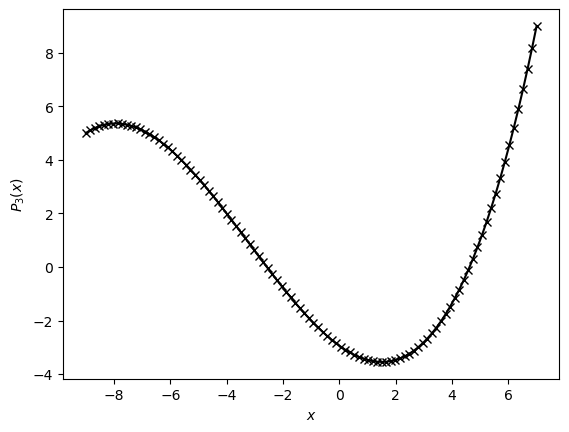

In [4]:
xvals = np.array([-9., -4., -1., 7.])
fvals = np.array([5., 2., -2., 9.])
xinterp = np.linspace(-9., 7., int(1e2))
ivals = lagran_interp(xvals, fvals, xinterp)
plt.plot(xinterp, ivals, '-x', color='k')
plt.xlabel("$x$")
plt.ylabel("$P_{3}(x)$")


and we see that we have recreated said example exactly. Okay, goo, we have working code. However, we are now going to look at a classic example of what is called the
*Runge Phenomena*, which in effect shows us that we cannot really go all that far with Lagrange interpolation if we insist on using equally spaced points.

To see this, we let
$$f(x) = \frac{1}{1+x^{2}}, -1 \leq x \leq 1.$$
Now keep in mind, the more nodes I use in my interpolation scheme, the higher the degree polynomial I am obliged to use. So suppose I use relatively few nodes, like only 10.
Then I get the following error plot for Lagrange interpolation.

[-1.  -0.8 -0.6 -0.4 -0.2  0.   0.2  0.4  0.6  0.8  1. ]
[0.5        0.6097561  0.73529412 0.86206897 0.96153846 1.
 0.96153846 0.86206897 0.73529412 0.6097561  0.5       ]


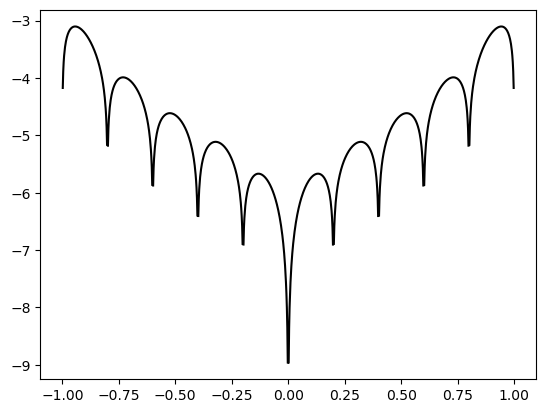

In [12]:
xinterp = np.linspace(-1., 1., int(1e3) + 1)
ftrue = 1./(1.+xinterp**2.)
xvals = xinterp[::100] #100 spacing
fvals = ftrue[::100]  #100 spacing
print(xvals)
print(fvals)
finterp = lagran_interp(xvals, fvals, xinterp)
plt.plot(xinterp, np.ma.log10(np.abs(ftrue - finterp)), ls='-', color='k')  ##np.ma 숫자에 해당하는 값은 표현하지 않겠다
plt.show()


And if we double the number of points, aside from the fact that the error is several orders of magnitude larger at the right end point, overall,
everything improves.

[-1.  -0.9 -0.8 -0.7 -0.6 -0.5 -0.4 -0.3 -0.2 -0.1  0.   0.1  0.2  0.3
  0.4  0.5  0.6  0.7  0.8  0.9  1. ]


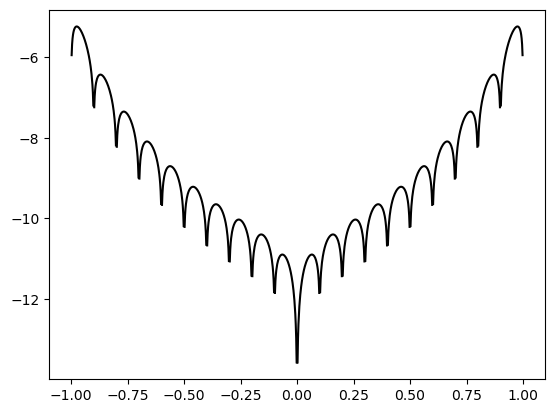

In [6]:
xvals = xinterp[::50]
print(xvals)
fvals = ftrue[::50]
finterp = lagran_interp(xvals, fvals, xinterp)
plt.plot(xinterp, np.ma.log10(np.abs(ftrue-finterp)), ls='-', color='k')
plt.show()

So, at this point, we might imagine that more nodes means greater accuracy. And that is in some sense true. And if we double the number of points again, we get

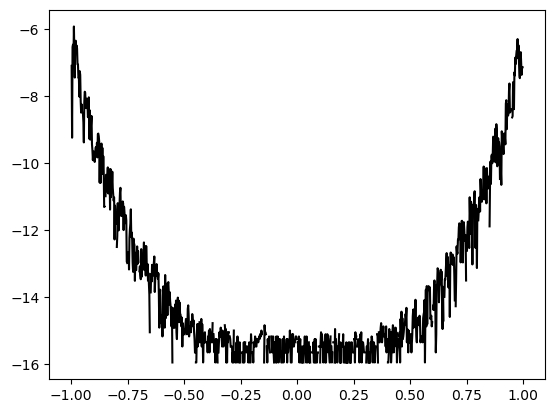

In [7]:
xvals = xinterp[::25]
fvals = ftrue[::25]
finterp = lagran_interp(xvals, fvals, xinterp)
plt.plot(xinterp, np.ma.log10(np.abs(ftrue-finterp)), ls='-', color='k')
plt.show()

So again, endpoints are problematic, but overall everything improved. So if we keep adding nodes, then we should eventually be able to get to machine precision, right? Wrong.

(84,)


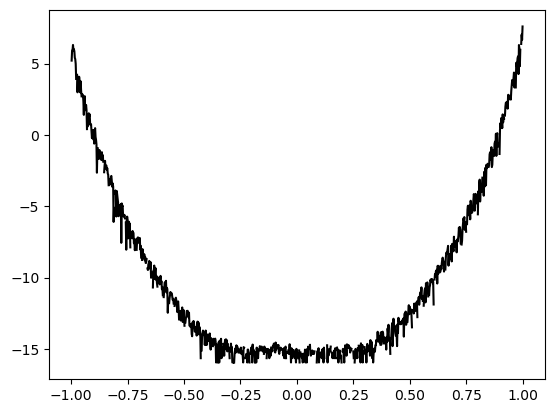

In [8]:
xvals = xinterp[::12]
print(np.shape(xvals))
fvals = ftrue[::12]
finterp = lagran_interp(xvals, fvals, xinterp)
plt.plot(xinterp, np.ma.log10(np.abs(ftrue - finterp)), ls='-', color='k')
plt.show()

As we see, more nodes actually made our approximation worse, not better. Further, as we see, while we can achieve machine precision on the interior of our interpolation scheme, we cannot get anywhere close to that at the boundaries. In order to get around this then, we might think of a different way to position nodes to address this issue. Thus, we get motivate discussing clustered meshes.

# Clustered Meshes
So, a way to get around the Runge Phenomena is to use unevenly spaced meshes of points. To wit, we use what are called the Chebyshev points or nodes, which are given by
$$x_{j} = \cos{\left(\frac{2j+1}{2n+2}\pi\right)}, j=0, \cdots, n$$
As we see below, by essentially clustering nodes at the endpoints of the interval we wish to interpolate over, we can remove the Runge Phenomena. This incidentally is the the beginning of a long conversation in numerical analysis we will not pursue further here.

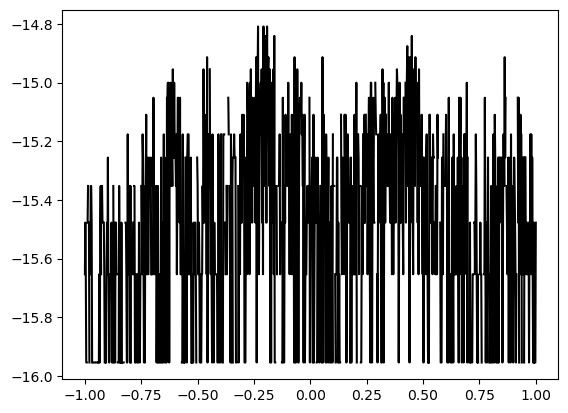

In [9]:
ncheb = 40
xcheb = np.cos(np.pi*(2.*np.arange(ncheb+1)+1.)/(2.*ncheb+2.))
fcheb = 1./(1.+xcheb**2.)
finterp = lagran_interp(xcheb, fcheb, xinterp)
plt.plot(xinterp, np.ma.log10(np.abs(ftrue-finterp)), ls='-', color='k')
plt.show()

# Linear Splines
Now we are going to try a very different approach to function approximation with what we did above with Lagrange Interpolationi.
Instead of one global interpolating polynomial for given data $\left\{\left(x_{j}, f_{j}\right)\right\}^{N}_{j=0}$, we are going to use a piecewise defined function $S(x)$ where
$$S(x) = 
\begin{cases}
S_{0}(x) & x_{0} \leq x < x_{1}\\
S_{1}(x) & x_{1} \leq x < x_{2}\\
\vdots   & \vdots\\
S_{n-1}(x) & x_{n-1} \leq x \leq x_{n}
\end{cases}$$
with the interpolation requirements
$$S_{j}(x_{j}) = f_{j}, j=0, \cdots, n-1, S_{n-1}(x_{n}) =f_{n},$$
and the continuity requirements at the interior points $\left\{x_{j}\right\}^{n-1}_{j=1}$
$$S_{j}(x_{j+1}) = S_{j+1}(x_{j+1}), j=0, \cdots, n-2.$$
By choosing $S_{j}(x) = m_{j}(x-x_{j})+f_{j}$, this continuity requirement gives us that
$$m_{j}(x_{j+1}-x_{j}) + f_{j} = f_{j+1},$$
or
$$m_{j} = \frac{f_{j+1}-f_{j}}{x_{j+1}-x_{j}}, j=0, \cdots, n-1.$$
To implement this then, we use the following code.

In [10]:
def linear_spline(xvals, fvals, xquery):
    npts = xvals.size
    qpts = xquery.size
    svals = np.zeros(qpts)
    # Precompute the slopes
    mvals = (fvals[1:]-fvals[:(npts-1)])/(xvals[1:]-xvals[:(npts-1)])
    # Now find the appropriate interval for each query point
    for ll in range(qpts):
        for jj in range(npts - 1):
            if xvals[jj]<=xquery[ll] and xquery[ll]<xvals[jj+1]:
                svals[ll] = mvals[jj]*(xquery[ll]-xvals[jj]) + fvals[jj]
                break
            svals[ll] = mvals[npts-2]*(xquery[ll]-xvals[npts-2]) + fvals[npts-2]

    return svals

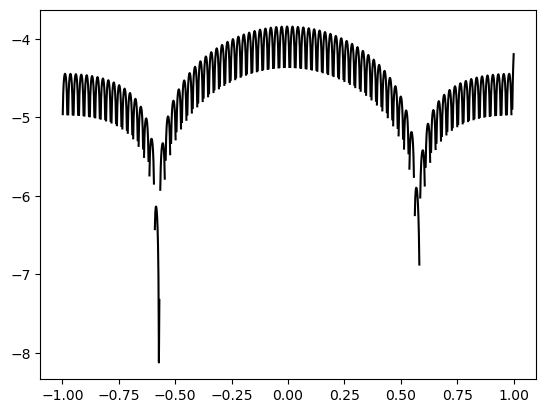

In [11]:
xquery = np.linspace(-1., 1., int(1e3)+1)
ftrue = 1./(1.+xquery**2.)
xvals = xquery[::12]
fvals = ftrue[::12]
finterp = linear_spline(xvals, fvals, xquery)
plt.plot(xinterp, np.ma.log10(np.abs(ftrue-finterp)), ls='-', color='k')
plt.show()

# Cubic Splines
So, while linear splines cleary work, they do not do so in a terribly efficient way. To improve on this then, as before, we start our discussion with a data set
$$\left\{x_{j}, f_{j}\right\}^{n}_{j=0}.$$
We now define our *cubic splines* $S_{j}(x)$ to be third order polynomials, i.e.
$$S_{j}(x) = a_{j}(x-x_{j})^{3} + b_{j}(x-x_{j})^{2} + c_{j}(x-x_{j}) +d_{j},$$
such that 
$$\begin{align*}
S_{j} (x_{j}) &= f_{j},  j=0, \cdots, n-1\\
S_{j}(x_{j+1}) &= S_{j+1}(x_{j+1}), j=0, \cdots, n-2\\
S^{\prime}_{j}(x_{j+1}) &= S_{j+1}(x_{j+1}), j=0, \cdots, n-2\\
S^{\prime \prime}_{j}(x_{j+1}) &= S_{j+1}(x_{j+1}), j=0, \cdots, n-2
\end{align*}$$
which is to say, we require that we interpolate the data, and the each spline as its first and second derivatives be continuous at each node. Finally, we require that
$$S_{n-1}(x_{n})=f_{n}, S^{\prime \prime}_{0} (x_{0}) = 0, S^{\prime \prime}_{n-1} =0.$$
We readily see then that $d_{j} = f_{j}$. Define
$$\delta x_{j} = x_{j+1} -x_{j}, \delta f_{j} = f_{j+1} -f_{j}.$$
Then from above we get the system of equations for $j=0, \cdots, n-2$
$$\begin{align*}
a_{j}(\delta x_{j})^{2} + b_{j}\delta x_{j} + c_{j} &= \frac{\delta f_{j}}{\delta x_{j}}, \\
3a_{j}(\delta x_{j})^{2} + 2b_{j}\delta x_{j} +c_{j} &= c_{j+1},\\
3a_{j}\delta x_{j} + b_{j} &= b_{j+1}
\end{align*}$$
The end point conditions give us 
$$a_{n-1}(\delta x_{n-1})^{2} + b_{n-1}\delta x_{n-1} + c_{n-1} = \frac{\delta f_{n-1}}{\delta x_{n-1}},$$
and 
$$b_{0} = 0, 3a_{n-1}\delta x_{n-1} + b_{n-1} = 0.$$
Solving for $a_{j}$ gives us,
$$a_{j} = \frac{1}{\delta x_{j}^{2}}\left(\frac{\delta f_{j}}{\delta x_{j}} - c_{j} -b_{j}\delta x_{j} \right), j=0, \cdots, n-1.$$
and in turn we then find that 
$$\begin{align*}
3 \frac{\delta f_{j}}{\delta x_{j}} - b_{j} \delta x_{j} - 2c_{j} &= c_{j+1}, j=0, \cdots, n-2\\
3 \frac{\delta f_{j}}{(\delta x_{j})^{2}} - 3\frac{c_{j}}{\delta x_{j}} - 2 b_{j} &= b_{j+1} , j=0, \dots, n-2,\\
\end{align*}$$
and
$$c_{n-1} \frac{\delta f_{n-1}}{\delta x_{n-1}} - \frac{2}{3} \delta x_{n-1}b_{n-1}.$$
I likewise, solving for $c_{j}$ then gives us
$$\vdots$$